# 데이터 다운로드 및 분석

In [1]:
#프로젝트에 사용될 라이브러리 import

import os

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

%matplotlib inline

 학습환경을 구성하고 데이터를 다운받아보자.

wget https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz

mkdir -p ~/aiffel/sp_tokenizer/data

mv korean-english-park.train.tar.gz ~/aiffel/sp_tokenizer/data

cd ~/aiffel/sp_tokenizer/data

tar -xzvf korean-english-park.train.tar.gz


In [2]:
#디렉토리 불러와서 변수(raw)로 지정.
path_to_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko'
  # 사용자의 홈 디렉토리 경로를 가져온 후, 해당 경로에 '\aiffel~'을 추가하여 파일 경로를 만듦.
with open(path_to_file, "r") as f:  #'path_to_file' 경로로 파일을 열고, 이 파일을 'f'라는 변수로 열게 됨.
    raw = f.read().splitlines()  #파일 내용을 읽어온 후, 'read()'함수로 파일 내용 전체를 문자열로 읽어옴.
                                 #'splitlines()'함수를 사용하여 문자열을 줄 단위로 분리하여 리스트로 저장.
                                 #이렇게 하면 파일의 각 줄이 리스트이 원소로 들어감.

print("Data Size:", len(raw))  #읽어온 데이터의 크기를 출력. len(raw)는 'raw'리스트의 길이를 나타냄.

print("Example:")
for sen in raw[0:100][::20]: print(">>", sen)  #'raw'리스트에서 처음 100개의 원소를 선택한 후, 20의 간격으로 원소를 순회.
                                               #0번째 문장, 20번째 문장, 40번째 문장, 60번째 문장, 80번째 문장이 선택된 원소들.
                                               #선택된 원소 'sen'을 출력. '>>'와 함께 선택된 원소의 내용이 출력됨.

Data Size: 94123
Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


data size: 94123

0, 20, 40, 60, 80번째 문장이 Example로 출력됐다.

문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 60


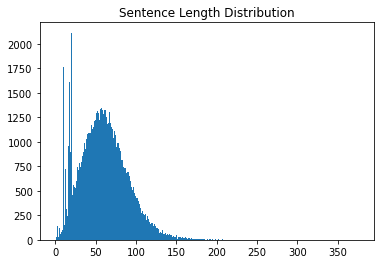

In [3]:
#문장 길이 확인.
min_len = 999
max_len = 0
sum_len = 0

for sen in raw:  #'raw'리스트에 있는 각 문장('sen')에 대해 반복문을 실행
    length = len(sen)  #현재 문장'sen'의 길이를 구해서 'length'변수에 할당
    if min_len > length: min_len = length  #현재 문장의 길이가 ' min_len'변수에 저장된 최소 길이보다 작다면, 'min_len'변수에 현재 길이를 저장.
    if max_len < length: max_len = length
    sum_len += length  #현재 문장의 길이를 'sum_len'변수에 더함. 'sum_len'변수는 전체 길이의 합을 나타내며, 문장 길이의 총합을 계산
    #'raw'리스트에 잇는 모든 문장을 반복하면서 각 문장의 길이를 계산하고, 최소 길이와 최대 길이를 업데이트하며 전체 길이의 합을 계산.


print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(raw))

sentence_length = np.zeros((max_len), dtype=int)  #길이가 'max_len'이고 0으로 초기화된 Numpy 배열
                                                  #sentence_length 배열의 dtype = 정수

for sen in raw:  #'raw'리스트에 있는 각 문장('sen')에 대해 반복문을 실행
    sentence_length[len(sen)-1] += 1  #'len(sen)-1': 현재 문장의 길이에서 1을 뺀 값 = 문장 길이를 배열 인덱스에 맞게 변환
                                      #길이가 1인 문장은 배열의 첫 번째 요소에 저장. 길이가 2인 문장은 두 번째 요소에 저장.
                                      #계산된 인덱스 위치에 해당하는 'sentence_length'배열의 값을 1 증가. 이를 통해 해당 길이의 문장이 등장한 빈도를 저장.

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

문장의 최단 길이:1

문장의 최장 길이:377

문장의 평균 길이:60

In [4]:
#길이가 1인 문장은 무엇인가?
def check_sentence_with_length(raw, length):
    count = 0  #변수'count'를 초기화

    for sen in raw:
        if len(sen) == length:  #현재 문장'sen'의 길이가 지정한 길이'length'와 일치하는지 검사
            print(sen)
            count += 1  #길이가 일치하는 문장을 찾았으면 'count'변수를 1 증가시킴.
            if count > 100: return  #변수'count'가 100을 초과하면 함수를 종료.
                                    #이는 문장이 너무 많아서 출력을 100개로 제한하고자 할 때 사용.

check_sentence_with_length(raw, 1)  #길이가 1인 문장을 찾아서 출력.

’


>>>> '

길이가 1인 문장은 노이즈 데이터였다!



In [5]:
#문장의 수가 1500을 초과하는 문장의 길이를 추출
for idx, _sum in enumerate(sentence_length):  #배열의 각 요소와 해당 요소의 인덱스를 반복하면서 'idx'와 'sum' 변수가 값을 할당.
                                              #'enumerate()'함수를 사용하여 인덱스와 요소를 한 번에 가져옴.
                                              #'idx'변수는 현재 문장의 길이를 의미.
    if _sum > 1500:
        print("Outlier Index:", idx+1)

Outlier Index: 11
Outlier Index: 19
Outlier Index: 21


문장의 수가 1500을 초과하는 문장 길이는 각각  11, 19, 21이다.

In [6]:
#길이가 11인 문장들은 어떤 것들이 있을까?
check_sentence_with_length(raw, 11)

라고 조던이 말했다.
- 모르고 있습니다.
- 네, 보이는군요.
디즈니사만이 아니다.
큰 파티는 아니지요.
의자는 비어 있었다.
이 일은 계속됩니다.
나는 크게 실망했다.
그 이유는 간단하다.
이력서와 자기 소개서
시대가 변하고 있다.
는 돌발질문을 했다.
9. 몇 분간의 명상
하와이, 빅 아일랜드
키스를 잘 하는 방법
키스를 잘 하는 방법
스피어스가 뚱뚱한가?
산 위를 나는 느낌.
세 시간쯤 걸었을까?
(아직 읽고있습니까?
처음에는 장난이었다.
우리는 운이 좋았다.
아기가 숨을 멈출 때
건물 전체 무너져내려
그녀의 아름다운 눈.
대답은 다음과 같다.
"사과할 것이 없다.
폭탄테러가 공포 유발
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1

중복에 대한 처리도 제대로 되지 않아보인다.

중복 제거 -> Python의 기본 자료형인 'set'을 활용

    'set': 집합을 정의하는 자료형.
    중복을 허용하지 않아 변환 과정에서 자동으로 중복된 요소를 제거
    다만, list의 순서가 뒤죽박죽될 수 있으니, 쌍을 이루는 데이터는 주의!
    

Data Size: 77591
문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 64


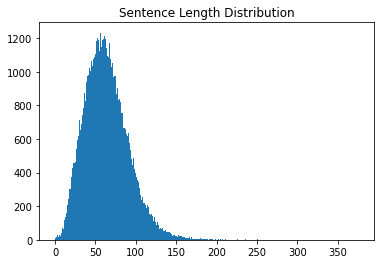

In [7]:
#중복 제거후 다시 길이 분포를 확인.

min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))  #'raw'리스트를 'set'으로 변환하여 중복을 제거하고 다시 'list()'로 감싸서 리스트로 변환.
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=int)

for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1  #문장의 길이를 배열 인덱스에 맞게 변환하는 역할

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

data size:77591

문장의 최단 길이:1

문장의 최장 길이:377

문장의 평균 길이:64

'모든 데이터를 다 사용할 것이냐?'에 대한 선택.

미니 배치를 만들 것을 생각하면 모든 데이터를 다 사용하는 것은 연산 측면에서 비효율적.

    미니 배치 특성상, 각 데이터의 크기가 모두 동일해야하기 때문에 가장 긴 데이터를 기준으로 padding 처리를 해야함.

여기서는 길이 150 이상의 데이터를 제거하고 사용.

또한 너무 짧은 데이터는 오히려 노이즈로 작용할 수 있으니, 길이가 10 미만이 데이터도 제거.



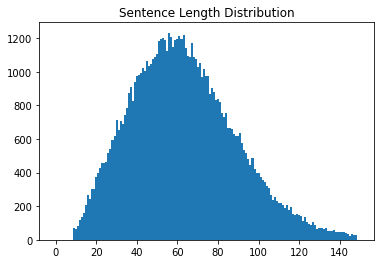

In [8]:
max_len = 150
min_len = 10

# 길이 조건에 맞는 문장만 선택하여 'filtered_corpus'리스트에 저장.
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

# 분포도를 다시 그려봄.
sentence_length = np.zeros((max_len), dtype=int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

# 공백 기반 토큰화

In [9]:
#입력된 문장들을 토큰화하고 숫자로 변환하여 텐서로 변환하는 함수를 정의하는 작업.
def tokenize(corpus):  # corpus: Tokenized Sentence's List
                       #'tokenize'함수: 토큰화된 문장들을 입력으로 받아서 처리하고, 토큰화된 텐서와 토크나이저를 반환
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
     #입력 텍스트를 토큰화하고, 토큰들을 숫자로 매핑하는 역할.
     #'filters='''는 특정 문자들을 필터링하지 않겠다는 의미 = 모든 문자를 토큰화
    tokenizer.fit_on_texts(corpus)
     #corpus에 있는 문장들을 기반으로 단어 사전을 생성. 이렇게 생성된 단어 사전은 각 단어를 고유한 정수로 매핑하는 역할
    tensor = tokenizer.texts_to_sequences(corpus)
     #문장들을 숫자 시퀀스로 변환. 각 단어가 생성된 단어사전에서 매핑된 정수로 대체됨.
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')
     #변환된 숫자 시퀀스를 패딩하여 모든 문장의 길이를 동일하게 함.
     #'padding='post''는 패딩을 시퀀스의 뒷부분에 적용하라는 의미.

    return tensor, tokenizer

In [10]:
#공백 기반 토큰화하여 저장.
split_corpus = []  #'split_corpus'는 이후에 반환된 단어들의 리스트를 저장할 목적으로 사용될 빈 리스트.

for kor in filtered_corpus:  #'filtered_corpus'리스트에 있는 각 문장('kor')에 대해 반복문을 실행
    split_corpus.append(kor.split())  #현재 문장'kor'를 공백을 기준으로 분할하고 단어들의 리스트로 변환하고, 그 결과를 'split_corpus'리스트에 추가

In [11]:
#'split_corpus'를 공백 기반 토큰화하여 숫자 시퀀스로 변환하고, 그 결과로 생성된 토크나이저의 단어 사전 크기를 출력.

split_tensor, split_tokenizer = tokenize(split_corpus)
  #'tokenize'함수를 사용해 'split_corpus'에 있는 문장들을 토큰화하여 텐서'split_tensor'와 토크나이저'split_tokenizer'를 얻음.
  #'tokenize'함수에 패딩까지 포함되어 있음.
print("Split Vocab Size:", len(split_tokenizer.index_word))
  #생성된 'split_tokenizer'의 단어 사전의 크기를 출력.
  #'index_word'속성: 정수로 매핑된 단어들의 딕셔너리.

Split Vocab Size: 237435


공백 기반 토크나이저의 단어 사전 크기: 237435

해당 토크나이저가 처리한 데이터의 고유한 단어의 개수가 237435개라는 의미이다.

In [12]:
#'split_tokenizer' 단어 사전의 각 단어와 그에 해당하는 인덱스를 출력.
for idx, word in enumerate(split_tokenizer.word_index):  #for 반복문을 통해 단어 사전을 열거
   #'enumerate'함수를 사용하여 각 단어와 해당하는 인덱스를 반복문 변수 'idx'와 'word'로 받아옴

    print(idx, ":", word)

    if idx > 10: break #인덱스 0부터 11까지 출력한 후 반복문을 종료.

0 : 이
1 : 밝혔다.
2 : 있다.
3 : 말했다.
4 : 수
5 : 있는
6 : 그는
7 : 대한
8 : 위해
9 : 전했다.
10 : 지난
11 : 이번


유사한 의미를 지닌 '밝혔다.'와 '밝히다', '밝다'는 전혀 다른 단어로 분류되고 있음.

즉, 공백 기반 토큰화는 불필요하게 큰 단어 사전을 가지게 되어 연산량을 증가시킴.

#형태소 기반 토큰화

In [13]:
!pip install python-mecab-ko
from mecab import MeCab
mecab = MeCab()

In [14]:
#'mecab'라이브러리를 사용하여 한국어 문장을 형태소로 분리하고, 그 결과를 'mecab_corpus'리스트에 저장.

def mecab_split(sentence):
    return mecab.morphs(sentence)  #'mecab_morphs()'함수: 한국어 문장을 형태소 단위로 분리하는 기능

mecab_corpus = []  #분리된 형태소들을 저장할 목적의 빈 리스트

for kor in filtered_corpus:  #'filtered_corpus'리스트에 있는 각 문장('kor')에 대해 반복문을 실행
    mecab_corpus.append(mecab_split(kor))
     #현재 문장('kor')를'mecab_split'함수에 넣어 형태소로 분리한 결과를 'mecab_corpus'리스트에 추가.

In [15]:
#형태소 기반 토큰화된 'mecab_corpus'를 숫자 시퀀스로 변환하고, 그 결과로 생성된 토크나이저의 단어 사전 크기를 출력.
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)

print("MeCab Vocab Size:", len(mecab_tokenizer.index_word))

MeCab Vocab Size: 52279


형태소 기반 토크나이저의 단어 사전 크기: 52779

공백 기반 토크나이저의 단어 사전 크기(237435)에 비해 단어 수가 현저히 줄어듦.

이는 곧 연산량 감소로이어져 더 빠른 학습을 가능케 하고, 모델이 튜닝해야 하는 parameter 수가 줄어 들어 학습도 잘됨.

적어도 한국어를 처리할 때는 공백 기반 토큰화를 절 대 지 양!

# 디코딩: Tensor -> 문장

In [16]:
#'tokenizer.sequences_to_texts()'함수를 사용하여 mecab_tensor[100]을 디코딩

texts = mecab_tokenizer.sequences_to_texts([mecab_tensor[100]])
  #'mecab_tensor' 중 101번째 데이터를 선택하여 텍스트로 변환.
  #'sequences_to_texts()'함수는 리스트를 입력으로 받으므로 리스트로 감싸서 입력
print(texts[0])  #texts리스트의 첫 번째 원소를 출력. 어차피 texts리스트는 101번째 데이터 하나만 선택했기때문에 원소가 1개이긴함.

' 종군 위안부 ' 는 일본 이 2 차 세계 대전 당시 성 노예 로 강제 징집 했 던 수천 명 의 여성 을 이르 는 말 이 다 .


In [17]:
#'tokenizer.index_word'를 사용하여 mecab_tensor[100]을 디코딩

sentence = ''

for w in mecab_tensor[100]:  #101번째 데이터에 있는 각 숫자를 반복. 'w'변수: 현재 숫자를 나타냄.
    if w == 0: continue  #'w'가 0인 경우는 패딩으로 나타내므로 무시하고 넘어감.
    sentence += mecab_tokenizer.index_word[w] + ''
      #현재 숫자'w'에 해당하는 단어를 'mecab_tokenizer.index_word'를 사용하여 단어로 변환하고, sentence에 추가.\
      #이때 단어 사이에 공백을 추가하여 문장을 구성.

print(sentence)

'종군위안부'는일본이2차세계대전당시성노예로강제징집했던수천명의여성을이르는말이다.


# 프로젝트 : 멋진 단어사전 만들기


##STEP1. SentencePiece 설치하기

In [18]:
pip install sentencepiece

Note: you may need to restart the kernel to use updated packages.


##STEP2. SentencePiece 모델 학습

spm(SentencePiece)는 오픈 소스의 자연어 처리 라이브러리로서, 서브워드 토큰화를 수행하는 도구이다.

서브워드 토큰화는 단어를 더 작은 단위로 분할하여 처리하는 방법으로, 공백 단위나 형태소 단위로 토큰화하지 않고도 언어의 복잡성을 다룰 수 있다.

    토크나이저를 학습?훈련?
    A) 주어진 텍스트 데이터에서 어떤 패턴을 학습하여 토큰화할 것인지 결정하고 학습된 토크나이저 모델을 파일로 저장한다. 저장된 토크나이저 모델을 사용하여 실제 텍스트 데이터를 토큰 단위로 분리하여 처리한다.

In [19]:
def tokenize(corpus):  # corpus: Tokenized Sentence's List
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer

tf.keras.preprocessing.text.Tokenizer에 corpus를 입력하고 tokenizer.fit_on_texts(corpus)을 하면 토크나이저 내부적으로 단어사전과 토크나이저 기능을 corpus에 맞춤형으로 자동 생성해줌.

In [20]:
import os
path_to_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko'
with open(path_to_file, "r") as f:
    raw = f.read().splitlines()

cleaned_corpus = list(set(raw))

max_len = 150
min_len = 10

# 길이 조건에 맞는 문장만 선택하여 'filtered_corpus'리스트에 저장.
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

In [21]:
import sentencepiece as spm
import os
temp_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp'

vocab_size = 8000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전에 나왔던 정제했던 corpus를 활용해서 진행해야 합니다.
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(  #sentencepiece를 사용하여 토크나이저를 훈련
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size)
)  #'input':입력 파일 지정, 'model_prefix': 모델의 이름 접두사 설정, 'vocab_size': 어휘 사전 크기 지정
#위 Train에서  --model_type = unigram이 디폴트 적용되어 있습니다. --model_type = bpe로 옵션을 주어 변경할 수 있습니다.

!ls -l korean_spm*  #훈련된 sentencepiece 모델 파일과 관련 파일을 확인하기 위한 명령어. 훈련된 모든 파일이 출력됨.

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=/aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp --model_prefix=korean_spm --vocab_size=8000
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: /aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp
  input_format: 
  model_prefix: korean_spm
  model_type: UNIGRAM
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id

-rw-r--r-- 1 root root 376816 Aug 16 08:10 korean_spm.model
-rw-r--r-- 1 root root 146213 Aug 16 08:10 korean_spm.vocab


위 코드를 실행하면 정상적으로 sentencepiece 모델 학습이 완료된 후 korean_spm.model파일과 korean_spm.vocab vocabulary 파일이 생성되었음을 확인할 수 있음.

In [22]:
s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[1243, 11, 302, 7, 3608, 11, 287, 38, 3]
['▁아버지', '가', '방', '에', '들어', '가', '신', '다', '.']
아버지가방에들어가신다.


##STEP3. Tokenizer 함수 작성

훈련시킨 SentencePiece를 활용하여 위 함수와 유사한 기능을 하는 sp_tokenize()함수를 정의.

하지만 sentencepiece가 동작하는 방식이 단순 토큰화와는 달라 완전히 동일하게 정의하기는 어려움.

아래 조건을 만족하는 함수를 정의하도록 하자.

    1. 온전한 문장의 list를 전달
    2. 생성된 vocab 파일을 읽어와 { <word> : <idx> }형태를 가지는 word_index 사전과 { <idx> : <word> }형태를 가지는 idex_word 사전을 생성하고 함께 반환
    3. 리턴값인 tensor는 앞의 함수와 동일하게 토큰화한 후 encoding된 문장이다. 패딩O

In [23]:
def sp_tokenize(s, corpus):

    tensor = []  #변환된 토큰들을 입력할 빈 리스트

    for sen in corpus:  #'corpus'리스트에 있는 각 문장('sen')에 대해 반복문을 실행
        tensor.append(s.EncodeAsIds(sen))
          #spm 모델 s'를 활용해 입력 문장을 토큰화하고, 숫자 시퀀스로 변환한 결과를 'tensor'리스트에 추가

    with open("./korean_spm.vocab", 'r') as f:  #vocab 파일 열기, 'r': 읽기 모드로 파일 열기
        vocab = f.readlines()  #파일을 한 줄씩 읽어와서 리스트로 반환

    word_index = {}  #'word_index' 딕셔너리 생성
    index_word = {}  #'index_word' 딕셔너리 생성
      #생성된 vocab 파일로 각 딕셔너리 형식에 맞게 각각 생성

    for idx, line in enumerate(vocab):
      #'vocab'리스트에 있는 각 줄을 순회하며 인덱스 'idx'와 해달 줄의 내용 'line'을 추출
        word = line.split("\t")[0]
          #'line'을 탭('\t')으로 분리하여 얻은 리스트에서 첫 번째 열에 있는 토큰을 추출하여 'word'변수에 저장
          #이렇게 추출된 토큰은 딕셔너리에 토큰과 숫자 ID를 매핑하는데 사용

        word_index.update({word:idx})  #토큰을 key로, 해당 토큰의 숫자 id를 value로.
          #토큰을 기반으로 숫자ID를 검색.
        index_word.update({idx:word})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')
      #변환된 토큰의 숫자 시퀀스를 패딩하여 길이를 맞춤

    return tensor, word_index, index_word
      #토큰화된 숫자 시퀀스('tensor')와 단어-인덱스 매핑하는 'word_index', 인덱스-단어를 매핑하는 'index_word'를 반환

's.EncoodeAsIds()'는 sentencepiece 모델 's'를 사용하여 주어진 문장을 토큰화하고, 토큰들을 해당하는 숫자ID로 변환하는 메서드.
spm은 단어나 서브워드와 같은 토큰들을 숫자 ID로 매핑하는 방식으로 작동.

spm을 학습하면, 학습 데이터에서 나타난 서브워드 단위의 패턴이 어휘 사전으로 생성된다.이렇게 생성된 어휘 사전에 따라 문장을 토큰화하고, 토큰들을 해당하는 숫자ID로 변환하는 것이 's.EncodeAsIds()'이다. 즉, 숫자ID 시퀀스로 변환해준다.

##STEP4. 네이버 영화리뷰 감정 분석 문제에 SentencePiece 적용해보기

##1.데이터 로드

In [24]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [25]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x7fa5aa08d4c0>)

In [26]:
train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('ratings_test.txt')

In [27]:
print('훈련용 리뷰 개수 :',len(train_data)) # 훈련용 리뷰 개수 출력

훈련용 리뷰 개수 : 150000


In [28]:
train_data[:5] # 상위 5개 출력


,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


##2.데이터 전처리 - spm 토큰화

**2-1.중복과 null값 제거**

In [29]:
# document 열과 label 열의 중복을 제외한 값의 개수
train_data['document'].nunique(), train_data['label'].nunique()


(146182, 2)

In [30]:
# document 열의 중복 제거
train_data.drop_duplicates(subset=['document'], inplace=True)


In [31]:
print('총 샘플의 수 :',len(train_data))


총 샘플의 수 : 146183


<AxesSubplot:>

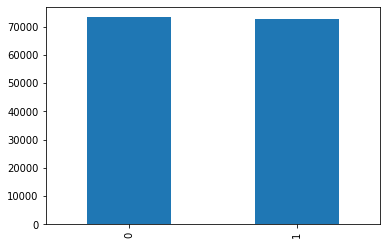

In [32]:
train_data['label'].value_counts().plot(kind = 'bar')


train data에서 해당 리뷰의 긍정과 부정 유무가 기재되어 있는 label값의 분포가 균일한 것처럼 보인다.

In [33]:
print(train_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0  73342
1      1  72841


In [34]:
#리뷰 중에 Null값을 가진 샘플이 있는지 확인
print(train_data.isnull().values.any())


True


In [35]:
#Null값이 어떤 열에 존재하는지 확인
print(train_data.isnull().sum())

id          0
document    1
label       0
dtype: int64


In [36]:
#Null값을 가진 샘플의 인덱스 위치 출력
train_data.loc[train_data.document.isnull()]

,id,document,label
25857,2172111,NaN,1


In [37]:
#Null값 가진 샘플을 제거
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


**2-2. 텍스트 정규화**

In [38]:
# 한글과 공백을 제외하고 모두 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data[:5]

/tmp/ipykernel_3868/3525229848.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [39]:
#한글이 없는 리뷰는 빈 값이 되었을테니 다시 한번 이상치 제거
train_data['document'] = train_data['document'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
train_data['document'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

id            0
document    789
label         0
dtype: int64


/tmp/ipykernel_3868/3514686550.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace('^ +', "") # white space 데이터를 empty value로 변경


In [40]:
#Null값 상위 5개 출력
train_data.loc[train_data.document.isnull()][:5]

,id,document,label
404,4221289,NaN,0
412,9509970,NaN,1
470,10147571,NaN,1
584,7117896,NaN,0
593,6478189,NaN,0


In [41]:
#Null값 제거
train_data = train_data.dropna(how = 'any')
print(len(train_data))

145393


In [42]:
#테스트 데이터도 똑같이 전처리
test_data.drop_duplicates(subset = ['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['document'] = test_data['document'].str.replace('^ +', "") # 공백은 empty 값으로 변경
test_data['document'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 48852


/tmp/ipykernel_3868/1404236827.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
/tmp/ipykernel_3868/1404236827.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['document'] = test_data['document'].str.replace('^ +', "") # 공백은 empty 값으로 변경


**2-3. spm을 통한 토큰화**



In [43]:
!pip install sentencepiece

In [44]:
#train_data의 document 열을 sentence에 할당
sentence = train_data['document']

sentence

0                                         아 더빙 진짜 짜증나네요 목소리
1                                흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나
2                                         너무재밓었다그래서보는것을추천한다
3                                 교도소 이야기구먼 솔직히 재미는 없다평점 조정
4         사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...
                                ...                        
149995                                      인간이 문제지 소는 뭔죄인가
149996                                           평점이 너무 낮아서
149997                        이게 뭐요 한국인은 거들먹거리고 필리핀 혼혈은 착하다
149998                           청춘 영화의 최고봉방황과 우울했던 날들의 자화상
149999                             한국 영화 최초로 수간하는 내용이 담긴 영화
Name: document, Length: 145393, dtype: object

Min length :  1
Max length :  140
Average length :  33


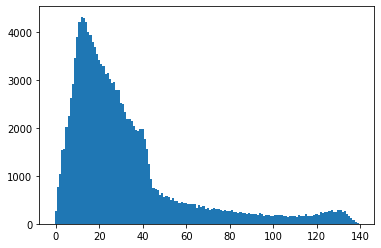

In [45]:
import matplotlib.pyplot as plt

min_len = 999
max_len = 0
sum_len = 0

for s in sentence:
  if len(s) < min_len :
    min_len = len(s)
  if len(s) > max_len :
    max_len = len(s)
  sum_len += len(s)

print('Min length : ', min_len)
print('Max length : ', max_len)
print('Average length : ', sum_len // len(sentence))

sen_length_cnt = [0] * max_len
for sen in sentence:
  sen_length_cnt[len(sen)-1] += 1

plt.bar(range(max_len), sen_length_cnt, width=1.0)
plt.show()

In [46]:
max_len = 150
min_len = 10

filtered_sen = []  #10 < 문장 길이 < 150에 해당하는 문장들을 저장하는 리스트
filtered_target = []  #해당 문장들에 대응하는 레이블을 저장하는 리스트

target = np.array(train_data['label'])

for s, t in zip(sentence, target):
  if (len(str(s)) < max_len) and (len(str(s)) >= min_len) :
    filtered_sen.append(s)
    filtered_target.append(t)

print(len(filtered_sen))
print(len(filtered_target))

130416
130416


In [49]:
import sentencepiece as spm
temp_file_path = os.getenv('HOME')+'/aiffel/sp_tokenizer/naver_MovieReview/ratings_test.txt.temp'

vocab_size = 130000

with open(temp_file_path, 'w') as f:
  for row in filtered_sen:
    f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(  #sentencepiece를 사용하여 토크나이저를 훈련
    '--input={} --model_prefix=ratings_train --vocab_size={}'.format(temp_file_path, vocab_size)
)

!ls -l ratings_train*

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=/aiffel/aiffel/sp_tokenizer/naver_MovieReview/ratings_test.txt.temp --model_prefix=ratings_train --vocab_size=130000
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: /aiffel/aiffel/sp_tokenizer/naver_MovieReview/ratings_test.txt.temp
  input_format: 
  model_prefix: ratings_train
  model_type: UNIGRAM
  vocab_size: 130000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab

-rw-r--r-- 1 root root  2951646 Aug 16 08:12 ratings_train.model
-rw-r--r-- 1 root root 14628807 Aug 16 08:10 ratings_train.txt
-rw-r--r-- 1 root root  2829626 Aug 16 08:12 ratings_train.vocab


In [50]:
s = spm.SentencePieceProcessor()
s.Load('ratings_train.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('어머니가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('어머니가방에들어가신다.',2, 0.1))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[14778, 18011, 22711, 37515, 0]
['▁어머니가', '방에', '들어가', '신', '다', '.']
어머니가방에들어가신다 ⁇ 


In [51]:
def sp_tokenize(s, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./ratings_train.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({word:idx})
        index_word.update({idx:word})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, word_index, index_word

tensor, word_index, index_word = sp_tokenize(s, filtered_sen)

문장의 최단 길이: 1
문장의 최장 길이: 140
문장의 평균 길이: 33


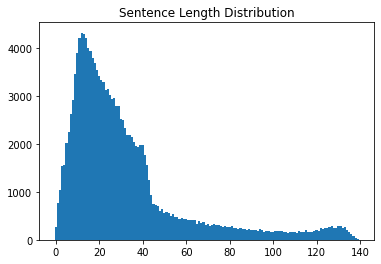

In [52]:
#문장 길이 확인.

import numpy as np
import matplotlib.pyplot as plt

min_len = 999
max_len = 0
sum_len = 0

for sen in sentence:  #'sentence'리스트에 있는 각 문장('sen')에 대해 반복문을 실행
    length = len(sen)  #현재 문장'sen'의 길이를 구해서 'length'변수에 할당
    if min_len > length: min_len = length  #현재 문장의 길이가 ' min_len'변수에 저장된 최소 길이보다 작다면, 'min_len'변수에 현재 길이를 저장.
    if max_len < length: max_len = length
    sum_len += length  #현재 문장의 길이를 'sum_len'변수에 더함. 'sum_len'변수는 전체 길이의 합을 나타내며, 문장 길이의 총합을 계산
#'sentence'리스트에 잇는 모든 문장을 반복하면서 각 문장의 길이를 계산하고, 최소 길이와 최대 길이를 업데이트하며 전체 길이의 합을 계산.


print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(sentence))

sentence_length = np.zeros((max_len), dtype=int)  #길이가 'max_len'이고 0으로 초기화된 Numpy 배열
                                                  #sentence_length 배열의 dtype = 정수

for sen in sentence:  #'sentence'리스트에 있는 각 문장('sen')에 대해 반복문을 실행
    sentence_length[len(sen)-1] += 1  #'len(sen)-1': 현재 문장의 길이에서 1을 뺀 값 = 문장 길이를 배열 인덱스에 맞게 변환
                                      #길이가 1인 문장은 배열의 첫 번째 요소에 저장. 길이가 2인 문장은 두 번째 요소에 저장.
                                      #계산된 인덱스 위치에 해당하는 'sentence_length'배열의 값을 1 증가. 이를 통해 해당 길이의 문장이 등장한 빈도를 저장.

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

##3.모델 구현 및 훈련

In [72]:
# 데이터 나누기
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(tensor, filtered_target, test_size=0.2)
y_train = np.array(y_train)
y_val = np.array(y_val)

In [56]:
# RNN 모델 설계
import tensorflow as tf

vocab_size = vocab_size
word_vector_dim = 200

model_rnn = tf.keras.Sequential()
model_rnn.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model_rnn.add(tf.keras.layers.LSTM(128))
model_rnn.add(tf.keras.layers.Dense(32, activation='relu'))
model_rnn.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_rnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 200)         26000000  
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               168448    
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 26,172,609
Trainable params: 26,172,609
Non-trainable params: 0
_________________________________________________________________


In [73]:
# 모델 훈련
from keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint("splstm.h5", monitor='val_accuracy',save_best_only=True)

model_rnn.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

epochs = 20

history_rnn = model_rnn.fit(x_train,
                              y_train,
                              epochs=epochs,
                              callbacks=[mc],
                              batch_size=128,
                              validation_data=(x_val, y_val),
                              verbose=1)


Epoch 1/20
816/816 [==============================] - 18s 21ms/step - loss: 0.6932 - accuracy: 0.5013 - val_loss: 0.6932 - val_accuracy: 0.4974
Epoch 2/20
816/816 [==============================] - 17s 21ms/step - loss: 0.6932 - accuracy: 0.4981 - val_loss: 0.6931 - val_accuracy: 0.5026
Epoch 3/20
816/816 [==============================] - 17s 21ms/step - loss: 0.6932 - accuracy: 0.4990 - val_loss: 0.6931 - val_accuracy: 0.5026
Epoch 4/20
816/816 [==============================] - 17s 20ms/step - loss: 0.6932 - accuracy: 0.4996 - val_loss: 0.6931 - val_accuracy: 0.5026
Epoch 5/20
816/816 [==============================] - 17s 20ms/step - loss: 0.6931 - accuracy: 0.5007 - val_loss: 0.6932 - val_accuracy: 0.4974
Epoch 6/20
816/816 [==============================] - 17s 20ms/step - loss: 0.6932 - accuracy: 0.4972 - val_loss: 0.6931 - val_accuracy: 0.5026
Epoch 7/20
816/816 [==============================] - 17s 20ms/step - loss: 0.6932 - accuracy: 0.5016 - val_loss: 0.6932 - val_accuracy:

##4.평가하기


In [84]:
x_test = np.array(s.EncodeAsIds(x) for x in test_data['document'])
y_test = np.array(test_data['label'])
print(len(y_test))

48852


In [85]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [86]:
from tensorflow.keras.models import load_model

model = load_model('splstm.h5')
results = model_rnn.evaluate(x_test, y_test, verbose=2)
print(results_rnn)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type generator).

In [61]:
# 평가하기
results_rnn = model_rnn.evaluate(x_test, y_test, verbose=2)
print(results_rnn)

history_dict_rnn = history_rnn.history

# train과 val의 Loss
acc_rnn = history_dict_rnn['accuracy']
val_acc_rnn = history_dict_rnn['val_accuracy']
loss_rnn = history_dict_rnn['loss']
val_loss_rnn = history_dict_rnn['val_loss']

epochs_rnn = range(1, len(acc_rnn) + 1)

# "bo"는 "파란색 점"
plt.plot(epochs_rnn, loss_rnn, 'bo', label='Training loss')
# b는 "파란 실선"
plt.plot(epochs_rnn, val_loss_rnn, 'b', label='Validation loss')
plt.title('RNN\'s Training & validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# train과 val의 accuracy
plt.clf()

plt.plot(epochs_rnn, acc_rnn, 'bo', label='Training acc')
plt.plot(epochs_rnn, val_acc_rnn, 'b', label='Validation acc')
plt.title('RNN\'s Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

ValueError: Failed to find data adapter that can handle input: (<class 'list'> containing values of types {'(<class \'list\'> containing values of types {"<class \'int\'>"})'}), <class 'numpy.ndarray'>

##5.데이터 전처리-mecab

In [87]:
!pip install python-mecab-ko
from mecab import MeCab
tokenizer_mecab = MeCab()

In [88]:
stopwords_list = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# load data 함수

import numpy as np
from collections import Counter

def load_data(train_data, test_data, num_words=16000):
  len_train = len(train_data)

  train_data = train_data.drop_duplicates('document', keep='first')
  test_data = test_data.drop_duplicates('document', keep='first')
  train_data = train_data.dropna(axis=0)
  test_data = test_data.dropna(axis=0)

  sentence_list = list(train_data['document'])

  token_list = []
  for sen in sentence_list:
    tokenize_sentence = tokenizer_mecab.morphs(sen)
    tokenize_sentence = [word for word in tokenize_sentence if word not in stopwords_list]
    token_list.append(tokenize_sentence)

  x_train = token_list[:len_train]
  x_val = token_list[len_train:]

  words = np.concatenate(x_train).tolist()
  counter = Counter(words)
  counter = counter.most_common(15000-4)
  vocab = ['<PAD>', '<BOS>', '<UNK>', '<UNUSED>'] + [key for key, _ in counter]

  word2index = {word : index for index, word in enumerate(vocab)}

  def wordlist_to_indexlist(wordlist):
    return [word2index[word] if word in word2index else word2index['<UNK>'] for word in wordlist]

  x_train=np.array(list(map(wordlist_to_indexlist, x_train)), dtype=object)
  x_val = np.array(list(map(wordlist_to_indexlist, x_val)), dtype=object)

  return x_train, np.array(list(train_data['label'][:len_train]), dtype=object), x_val, np.array(list(train_data['label'][len_train:]), dtype=object), word2index
x_train, y_train, x_val, y_val, word2index = load_data(train_data, test_data)

index2word = {index : word for word, index in word2index.items()}

In [89]:
#토큰화 된 문장들의 길이 분포 확인, 패딩을 위한 최대 문장 길이 지정

total_data_text = list(x_train) + list(x_val)

# 텍스트데이터 문장길이의 리스트를 생성
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)

# 문장길이의 평균값, 최대값, 표준편차를 계산
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

# 최대 길이를 (평균 + 2 * 표준편차) 로 한다면 남는 문장의 비율은?
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))

문장길이 평균 :  13.939966578470965
문장길이 최대 :  83
문장길이 표준편차 :  11.437878687723702
pad_sequences maxlen :  36
전체 문장의 0.9327252471800584%가 maxlen 설정값 이내에 포함됩니다. 


In [90]:
import tensorflow as tf

# 문장의 마지막 입력이 최종 state에 영향을 가장 크게 미치기 때문에 패딩 적용은 pre(앞쪽)으로 해줍니다.
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        value=word2index['<PAD>'],
                                                        padding = 'pre',
                                                        maxlen = maxlen)


x_val = tf.keras.preprocessing.sequence.pad_sequences(x_val,
                                                       value=word2index["<PAD>"],
                                                       padding='pre',
                                                       maxlen=maxlen)

##6.모델 훈련

In [91]:
x_train = x_train.astype(np.float32)
y_train = y_train.astype(np.float32)
x_val = x_val.astype(np.float32)
y_val = y_val.astype(np.float32)

In [92]:
vocab_size = 16000
word_vector_dim = 200

In [93]:
model_rnn_mecab = tf.keras.Sequential()
model_rnn_mecab.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model_rnn_mecab.add(tf.keras.layers.LSTM(128))
model_rnn_mecab.add(tf.keras.layers.Dense(32, activation='relu'))
model_rnn_mecab.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_rnn_mecab.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 200)         3200000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               168448    
_________________________________________________________________
dense_4 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 3,372,609
Trainable params: 3,372,609
Non-trainable params: 0
_________________________________________________________________


In [94]:
model_rnn_mecab.compile(optimizer = 'adam',
                         loss = 'binary_crossentropy',
                         metrics=['accuracy'])

epochs = 20

history_rnn_mecab = model_rnn_mecab.fit(x_train,
                                          y_train,
                                          epochs=epochs,
                                          batch_size=64,
                                          validation_data=(x_val, y_val),
                                          )

Epoch 1/20
2245/2245 [==============================] - 14s 6ms/step - loss: 0.3690 - accuracy: 0.8335
Epoch 2/20
2245/2245 [==============================] - 13s 6ms/step - loss: 0.2817 - accuracy: 0.8795
Epoch 3/20
2245/2245 [==============================] - 13s 6ms/step - loss: 0.2310 - accuracy: 0.9045
Epoch 4/20
2245/2245 [==============================] - 13s 6ms/step - loss: 0.1843 - accuracy: 0.9257
Epoch 5/20
2245/2245 [==============================] - 13s 6ms/step - loss: 0.1451 - accuracy: 0.9416
Epoch 6/20
2245/2245 [==============================] - 13s 6ms/step - loss: 0.1150 - accuracy: 0.9537
Epoch 7/20
2245/2245 [==============================] - 13s 6ms/step - loss: 0.0916 - accuracy: 0.9634
Epoch 8/20
2245/2245 [==============================] - 13s 6ms/step - loss: 0.0741 - accuracy: 0.9704
Epoch 9/20
2245/2245 [==============================] - 13s 6ms/step - loss: 0.0600 - accuracy: 0.9761
Epoch 10/20
2245/2245 [==============================] - 13s 6ms/step - l

데이터를 처리하는 과정에 train_data와 test_data를 합쳐버려서 모델이 과적합돼버렸다. 그래서 다시 대부분의 시간을 다시 분리시키는데 썼다. 